Table of Contents:

1.Dataset Description

2.Import libraries

3.Import dataset

4.Exploratory data analysis

5.Declare feature vector and target variable

6.Split data into separate training and test set

7.Decision Tree classifier with criterion gini-index

8.Decision Tree classifier with criterion entropy

9.Confusion matrix

10.Classification report

11.Results and conclusion

# Dataset description

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum."
This data set contains a combination of numerical and categorical features:

categorical

Country
Year: 1985 to 2016
Sex: Male/female
Age: Five age groups
Generation

Numerical

Population
Number of Suicides: Suicide incidences
Suicides per 100k people:normalized version of suicide incidences
GDP for year: Gross Domestic Product(a measure of economic development)
GDP per capita for year: GDP/population
HDI for year : Human Development Index

# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset

In [3]:
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/master.csv')

# EDA

In [6]:
df.shape

(27820, 12)

We can see that there are 27820 instances and 12 variables in the data set.

In [4]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k',
                      'country-year', 'yearlyHDI', 'GDPpyear', 'GDPpcapita', 'generation']

df.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,GDPpcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#fixing and cleaning the original data  
df['GDPpyear'] = df.apply(lambda x: float(x['GDPpyear'].replace(',', '')), axis=1)
df.sex.astype('category')

0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: category
Categories (2, object): ['female', 'male']

The original data set contains data from more than 100 countries during 1985-2016. I've decided to limit the number of countries to make the analysis more insightful. I've chosen 40 countries from different parts of the world that I believe are a good sample of the different regions.

In [6]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

Text(0.5, 0, 'Suicides per 100K')

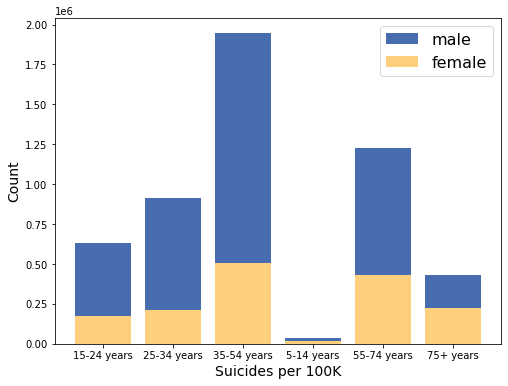

In [7]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

<center>FIG.NO-1</center>

Male population around the age of 35-54 years are more prone to suicidal attacks.

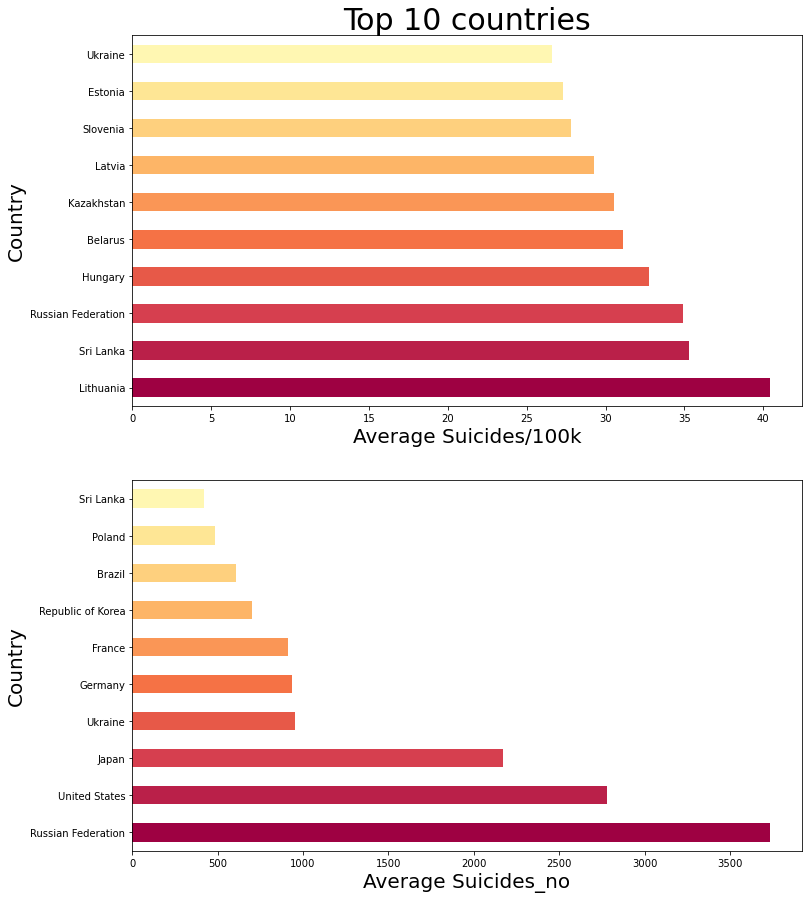

In [8]:
plt.figure(figsize=(12, 15))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

<center>FIG.NO-2</center>

It can be seen that Russian Federation holds the top position of having more number of suicides.

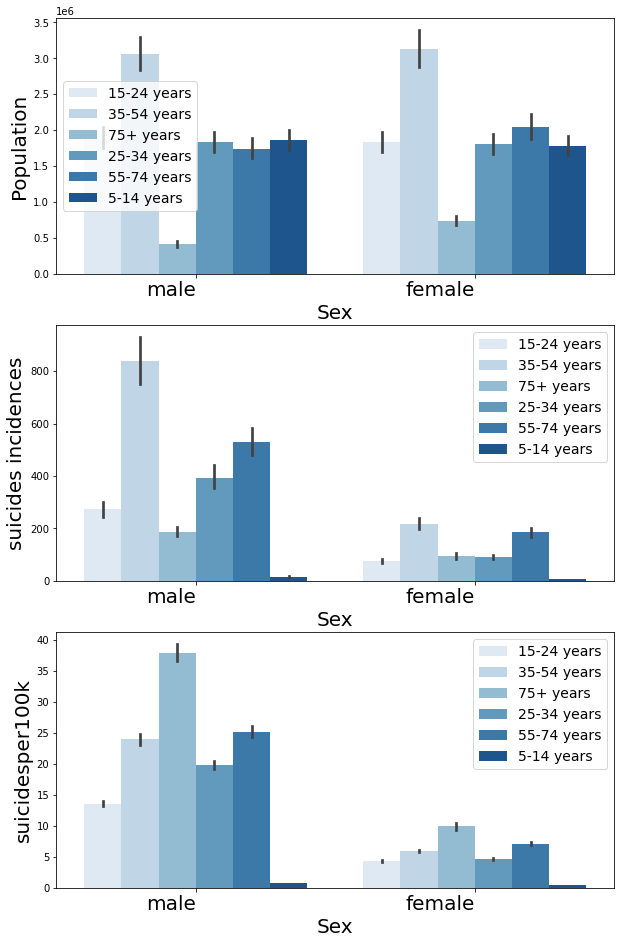

In [9]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicidesper100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

<center>FIG.NO-3</center>

Suicide incidences are more among the age group of 35-54 years in both the genders.

In population perspective, 35-54 years age group are more prone to suicides.

Importing the suicide data set with extra features added from WDI database

In [10]:
extra_data = pd.read_csv('C:/Users/User/OneDrive/Desktop/suicidedataextrafestures.csv')

extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation',
    'Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal', 'Lifeexpectancy', 'Mobilesubscriptionsp100',
    'Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [11]:
extra_data.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

the extra data from the WDI database was only available for 1995-2013, so I decided to limit the data to this time period.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 120 to 14821
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9216 non-null   object 
 1   year                     9216 non-null   int64  
 2   sex                      9216 non-null   object 
 3   age                      9216 non-null   object 
 4   suicides_no              9216 non-null   int64  
 5   population               9216 non-null   int64  
 6   suicidesper100k          9216 non-null   float64
 7   country-year             9216 non-null   object 
 8   yearlyHDI                3264 non-null   float64
 9   GDPpyear                 9216 non-null   float64
 10  GDPpcapita               9216 non-null   int64  
 11  generation               9216 non-null   object 
 12  suicide%                 9216 non-null   float64
 13  Internetusers            9132 non-null   float64
 14  Expenses             

In [13]:
#frequency count of categorical variables
col_names = ['country', 'sex', 'age', 'country-year', 'generation']


for col in col_names:
    
    print(df[col].value_counts())

Argentina             228
Norway                228
Israel                228
Italy                 228
Japan                 228
Mexico                228
Netherlands           228
New Zealand           228
Romania               228
Hungary               228
Russian Federation    228
Spain                 228
Sweden                228
Switzerland           228
Turkmenistan          228
United Kingdom        228
Iceland               228
Ireland               228
Greece                228
Colombia              228
Austria               228
Belgium               228
Brazil                228
Bulgaria              228
Canada                228
Chile                 228
Germany               228
United States         228
Croatia               228
Cuba                  228
Czech Republic        228
Denmark               228
Finland               228
France                228
South Africa          216
Thailand              216
Ukraine               216
Australia             216
Poland      

Text(0, 0.5, 'count')

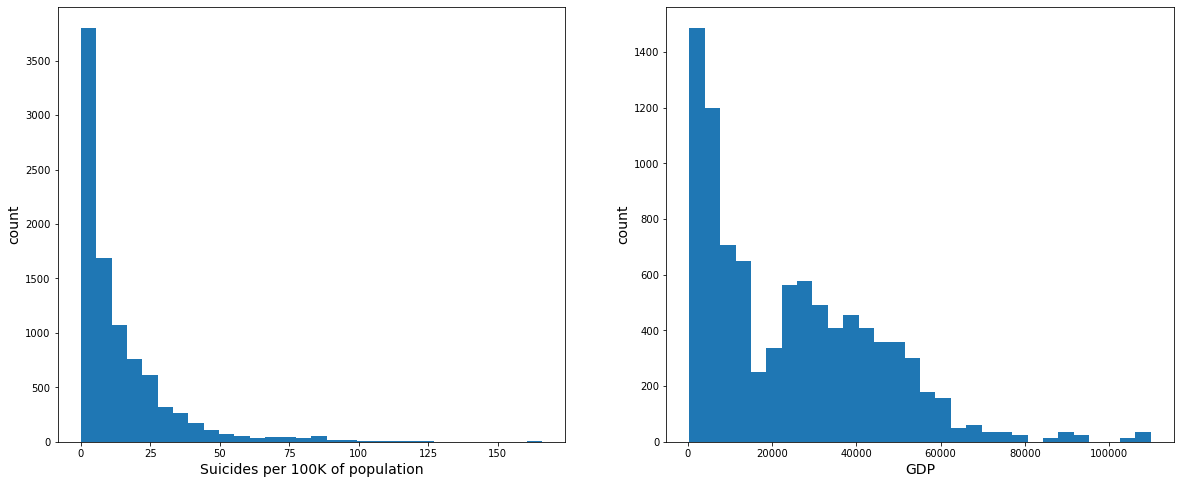

In [14]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.suicidesper100k, bins=30)
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.GDPpcapita, bins=30)
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)


<center>FIG.NO-4</center>

From all the extra features added from the WDI database, I'm using 11 features for exploring. These are basically the features with fewer null values.

totalfeatures: 'country', 'year','GDPpyear','GDPpcapita','employeecompensation','Unemployment', 'Lifeexpectancy','Refugees','Selfemployed','Internetusers','population'.

I'm aslo lifting the fine subsample level of sex and age group. I'm creating a new pandas data frame "total", with a new column "suicides" as the total value of Suicides per 100k of population per country per year, calculated by summing over both sexes and age groups.

In [15]:
features = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
            'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

In [16]:
totalfeatures = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
                 'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers', 'population']

Text(0.5, 0, 'GDP')

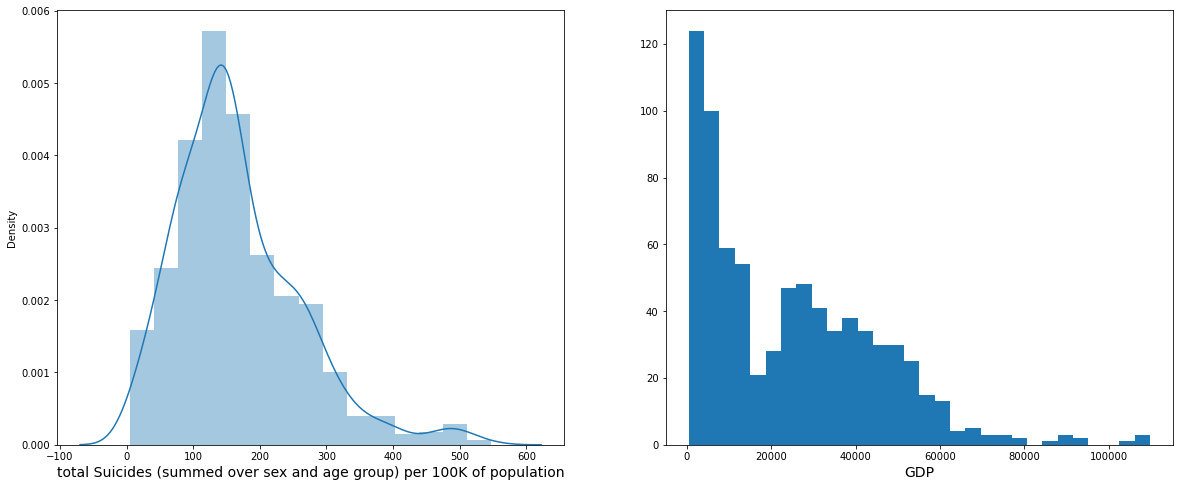

In [17]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.GDPpcapita, bins=30)
plt.xlabel('GDP', fontsize=14)

<center>FIG.NO-5</center>

# Calculating correlation for chosen features

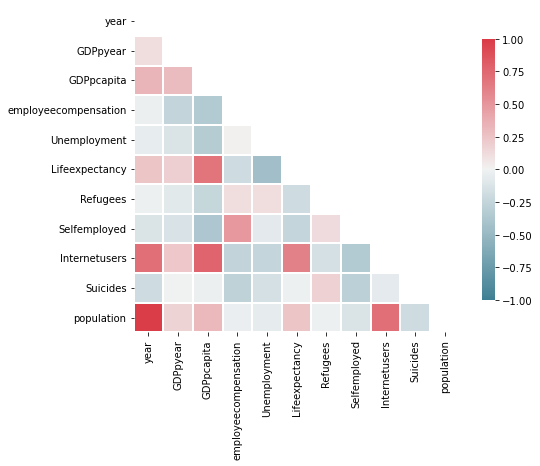

In [18]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

<center>FIG.NO-6</center>

The feature "Internetusers" is strongly correlated with GDP features, as expected. "Lifeexpectancy" also shows strong corrlaiton with GDP per capital. This should be noted when evaluating feature importances from model outputs. Other features do not show strong correlations.

# Pre-processing to remove null values

In [19]:
# Cleaning the data, replacing null values with appropriate replacements

total.Internetusers.fillna(total.Internetusers. min(), inplace=True)
total.Refugees.fillna(8, inplace=True)
total.employeecompensation.fillna(total.employeecompensation.mean(), inplace=True)
total.population.fillna(total.population.mean(), inplace=True)

Binary classification for suicide risk

I decided to perform a binary classification on the suicide data, by assigning risk classes based on the suicide incidences per 100k of the population as high/low suicide risk. Adding an extra column to the "total" data frame as 'risk'.

Suicides<mean(Suicides) --> low risk --> class 0
Suicides>mean(Suicides) --> high risk --> class 1

In [20]:
total['risk'] = total.Suicides.copy()

total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

Text(0.5, 0, 'Suicides')

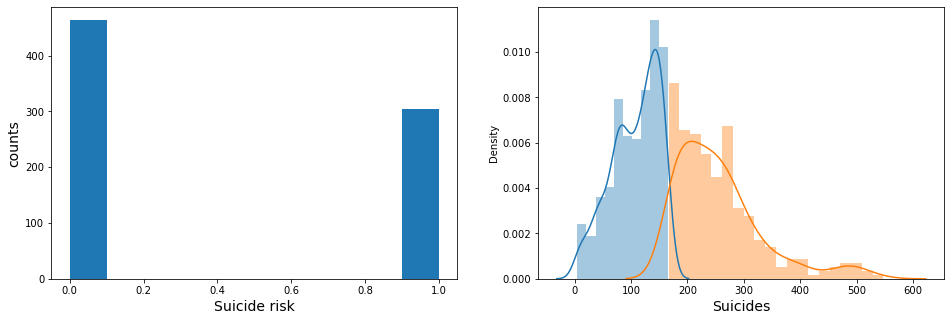

In [21]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk)
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.risk == 0], bins=10)
sns.distplot(total.Suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

<center>FIG.NO-7</center>

The risk is low in most of the cases as 0's are present more.

In [22]:
# Label encoding countries

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

total.country = le.fit_transform(total.country)  # Alphabetic order [0:40]
total.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
total['risk'].unique()

array([0, 1])

In [26]:
# Preparing data for modeling

X = total[totalfeatures]
y = total['risk']


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)


In [27]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (576, 11) (576,)
Test set: (192, 11) (192,)


In [28]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Decision Tree Classifier with criterion gini index

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index

In [31]:
y_pred_gini=clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6979


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [33]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7656


Check for overfitting and underfitting

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7656
Test set score: 0.6979


Here, the training-set accuracy score is 0.7656 while the test-set accuracy to be 0.6979. These two values are quite comparable. So, there is no sign of underfitting.

[Text(0.5769230769230769, 0.875, 'X[8] <= 0.473\ngini = 0.481\nsamples = 576\nvalue = [344, 232]'),
 Text(0.3076923076923077, 0.625, 'X[7] <= -0.236\ngini = 0.498\nsamples = 484\nvalue = [259, 225]'),
 Text(0.15384615384615385, 0.375, 'X[4] <= -0.313\ngini = 0.467\nsamples = 384\nvalue = [241, 143]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.493\nsamples = 198\nvalue = [87, 111]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.285\nsamples = 186\nvalue = [154, 32]'),
 Text(0.46153846153846156, 0.375, 'X[0] <= -0.883\ngini = 0.295\nsamples = 100\nvalue = [18, 82]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.098\nsamples = 77\nvalue = [4, 73]'),
 Text(0.8461538461538461, 0.625, 'X[7] <= 3.734\ngini = 0.141\nsamples = 92\nvalue = [85, 7]'),
 Text(0.7692307692307693, 0.375, 'X[7] <= -0.278\ngini = 0.086\nsamples = 89\nvalue = [85, 4]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 

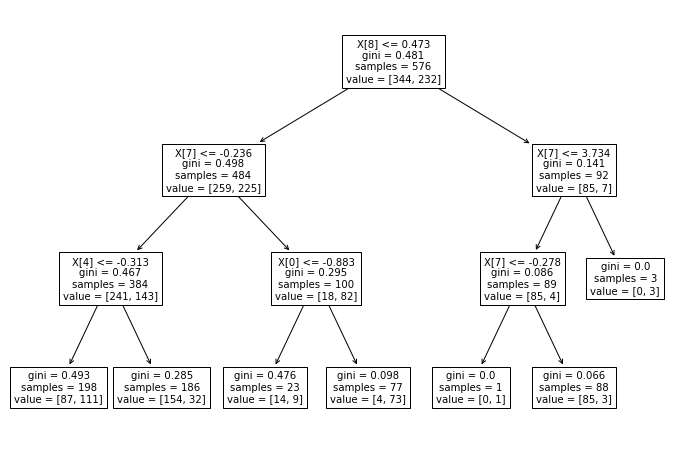

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

<center>FIG.NO-8</center>

In [37]:
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test = pd.DataFrame(X_test,columns=X.columns)

# Decision Tree Classifier with criterion entropy

In [62]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy

In [63]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [64]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6979


Compare the train-set and test-set accuracy

In [65]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [66]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7639


In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7639
Test set score: 0.6979


We can see that the training-set score and test-set score is same as above.

[Text(0.5769230769230769, 0.875, 'X[8] <= 0.567\nentropy = 0.973\nsamples = 576\nvalue = [344, 232]'),
 Text(0.3076923076923077, 0.625, 'X[7] <= -0.236\nentropy = 0.995\nsamples = 501\nvalue = [272, 229]'),
 Text(0.15384615384615385, 0.375, 'X[4] <= -0.313\nentropy = 0.949\nsamples = 391\nvalue = [247, 144]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.989\nsamples = 199\nvalue = [87, 112]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.65\nsamples = 192\nvalue = [160, 32]'),
 Text(0.46153846153846156, 0.375, 'X[0] <= -0.883\nentropy = 0.773\nsamples = 110\nvalue = [25, 85]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.918\nsamples = 27\nvalue = [18, 9]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.417\nsamples = 83\nvalue = [7, 76]'),
 Text(0.8461538461538461, 0.625, 'X[7] <= 3.734\nentropy = 0.242\nsamples = 75\nvalue = [72, 3]'),
 Text(0.7692307692307693, 0.375, 'X[3] <= -1.067\nentropy = 0.104\nsamples = 73\nvalue = [72, 1]'),
 Text(0.6923076923076923, 0.125, 'entropy 

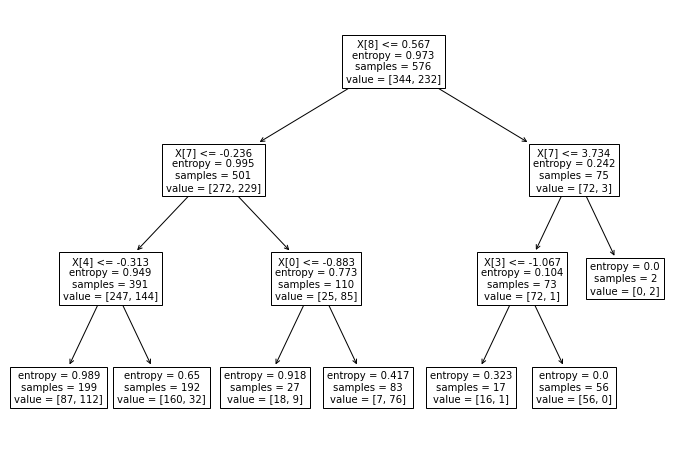

In [68]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

<center>FIG.NO-9</center>

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion Matrix

In [69]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[79 41]
 [17 55]]


# Classification Report

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       120
           1       0.57      0.76      0.65        72

    accuracy                           0.70       192
   macro avg       0.70      0.71      0.69       192
weighted avg       0.73      0.70      0.70       192



# Results & Conclusion

1.I build a Decision-Tree Classifier model to predict the risk of suicide. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.70.

2.In the model with criterion gini index, the training-set accuracy score is 0.76 while the test-set accuracy to be 0.69. These two values are quite comparable. So, there is no sign of overfitting.

3.Similarly, in the model with criterion entropy, the training-set accuracy score is 0.76 while the test-set accuracy to be 0.69.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

4.In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.

5.The confusion matrix and classification report yields very good model performance.